This is basic Linear regression model to predict salary based on experienc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv ('salary_prediction_data.csv')
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [4]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [5]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [6]:
ohe  = OneHotEncoder(handle_unknown='ignore',  sparse_output= False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(df[['Job_Title', 'Gender']])
ohetransform

,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Female,Gender_Male
0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,1.0,0.0
996,0.0,0.0,1.0,0.0,1.0,0.0
997,1.0,0.0,0.0,0.0,0.0,1.0
998,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
df = pd.concat([df, ohetransform], axis = 1).drop(['Job_Title', 'Gender'], axis = 1)

In [8]:
df.head()

,Education,Experience,Location,Age,Salary,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Gender_Female,Gender_Male
0,High School,8,Urban,63,84620.053665,0.0,0.0,0.0,1.0,0.0,1.0
1,PhD,11,Suburban,59,142591.255894,0.0,1.0,0.0,0.0,0.0,1.0
2,Bachelor,28,Suburban,61,97800.255404,0.0,0.0,0.0,1.0,1.0,0.0
3,High School,29,Rural,45,96834.671282,0.0,1.0,0.0,0.0,0.0,1.0
4,PhD,25,Urban,26,132157.786175,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
x = df[['Experience', 'Age', 'Job_Title_Analyst', 'Job_Title_Director', 'Job_Title_Engineer', 'Job_Title_Manager']]
y = df['Salary']

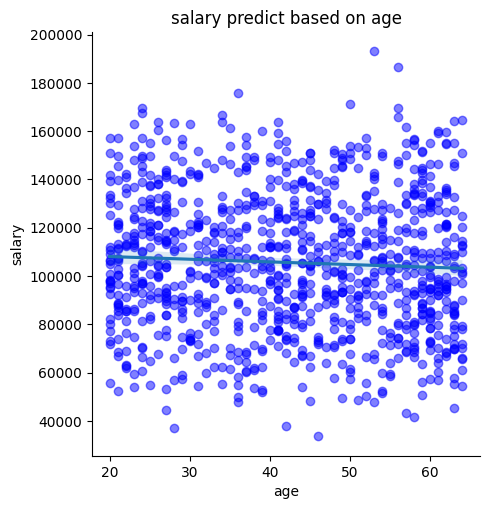

In [10]:
sns.lmplot(x="Age", y="Salary", data = df, scatter_kws={"color": "blue", "alpha": 0.5})
plt.xlabel("age")
plt.ylabel("salary")
plt.title("salary predict based on age")
plt.show()

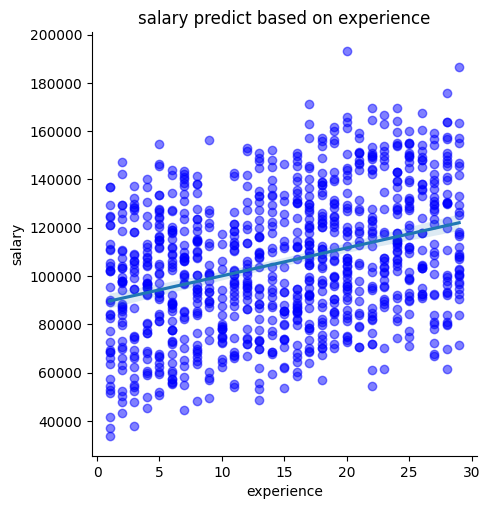

In [11]:
sns.lmplot(x="Experience", y="Salary", data = df, scatter_kws={"color": "blue", "alpha": 0.5})
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("salary predict based on experience")
plt.show()

In [12]:
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3,random_state= 42)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = lr.predict(X_test)
predictions

array([ 92729.38929839,  82807.81119821,  92808.00429994, 112597.44453547,
       109977.1664357 ,  84680.68198945, 104193.49053554,  85625.4600322 ,
       104683.9655773 , 100628.29673311, 116784.95635005, 126131.99997423,
       105756.13844747,  91344.81713442, 107908.61332875, 109845.04814547,
        96947.73257839,  98527.49906209, 113967.44517599, 104814.12012919,
       101996.60895513, 106019.26991941, 110496.50920453, 134894.31072567,
       104390.86126976, 105188.73682267, 101993.71157074,  97762.00573317,
       117029.28083172, 119342.02076041, 132842.1552206 ,  81521.14902205,
        82416.93456278, 106049.24275501, 109095.81475851, 119325.76081846,
       111524.27537556, 132956.18749046, 104732.60774325, 126017.96770437,
       103964.56736602,  99439.40688485, 105579.6134581 , 130773.73977357,
        98641.53133194,  88739.1105581 , 104700.22551926, 100025.96583599,
       100628.43439303,  89762.29092625, 102710.42507378,  99113.57001724,
       111783.17138069, 1

In [15]:
print("Mean Squared Error: ", mean_squared_error(y_test,  predictions))
print("Root Mean Squared Error: ", r2_score(y_test,  predictions))

Mean Squared Error:  639835501.4356295
Root Mean Squared Error:  0.2745283315777234


Taking user inputs

In [16]:
def get_user_input():
    print("Please provide the following details to predict the Salary:")

    # Assuming input for specific features
    Age = int(input("Age: "))
    Experience = int(input("Experience: "))
    Job_Title = input("Job Title (Analyst, Director, Engineer, Manager): ")

    # Create a DataFrame for the input
    user_data = pd.DataFrame({
        'Experience': [Experience],
        'Age': [Age],
        'Job_Title_Analyst': [1 if Job_Title == 'Analyst' else 0],
        'Job_Title_Director': [1 if Job_Title == 'Director' else 0],
        'Job_Title_Engineer': [1 if Job_Title == 'Engineer' else 0],
        'Job_Title_Manager': [1 if Job_Title == 'Manager' else 0]
    })

    return user_data

# Get the user input
user_input = get_user_input()

# Predict the salary using the trained model
predicted_salary = lr.predict(user_input)

# Output the prediction
print(f"\nThe predicted salary: ${predicted_salary[0]:.2f}")

Please provide the following details to predict the Salary:

The predicted salary: $98071.23
